In [80]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import numpy as np

plt.style.use('ggplot')


In [94]:

def plot_predictions(inputs, predictions, targets, title, figname):
    # for _ in range(3):
        # sample_index = np.random.randint(len(inputs))
        print(len(inputs))
        sample_index = 2
        location_index = 2

        input_sample = inputs[sample_index][:, location_index]
        prediction_sample = predictions[sample_index][:, location_index]
        target_sample = targets[sample_index][:, location_index]

        time_axis_input = np.arange(120)
        time_axis_future = np.arange(120, 132)

        # Extend the input time axis and samples to include the first future point for a seamless transition
        extended_time_axis_input = np.append(time_axis_input, time_axis_future[0])
        extended_input_sample = np.append(input_sample, target_sample[0])

        plt.figure(figsize=(12, 6))
        plt.plot(extended_time_axis_input, extended_input_sample, label='Historical Temperature', zorder=1)
        plt.plot(time_axis_future, target_sample, label='Actual Temperature', zorder=2, color="black")
        plt.plot(time_axis_future, prediction_sample, label='Predicted Temperature', linestyle='--', zorder=3)

        plt.title(title)
        plt.xlabel('Time Steps (Months)')
        plt.ylabel('Temperature Anomaly (K)')
        plt.legend()
        plt.savefig(f'figures/{figname}.jpg', format='jpg', dpi=300)
        plt.show()


def display_test_results(file_path, title, figname):
    with open(file_path, 'rb') as f:
        test_results = pickle.load(f)

    test_loss = test_results['loss']
    test_rmse = test_results['rmse']
    test_mae = test_results['mae']
    test_r_squared = test_results['r_squared']
    inputs = test_results['inputs']
    predictions = test_results['predictions']
    targets = test_results['targets']

    print(f"Test Loss: {test_loss} | Test RMSE: {test_rmse} | Test MAE: {test_mae} | Test R^2: {test_r_squared}")
    plot_predictions(inputs, predictions, targets, title, figname)

Test Loss: 0.014609364792704582 | Test RMSE: 0.1199866955478986 | Test MAE: 0.08321057508389156 | Test R^2: 0.6911923817356431
3


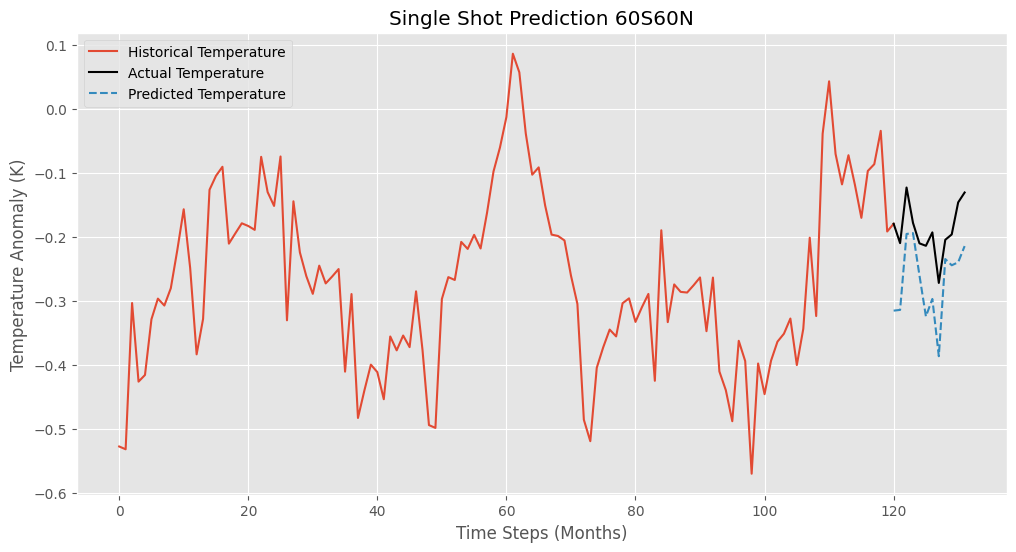

In [95]:
display_test_results('results/single_shot_test_results.pkl', 'Single Shot Prediction 60S60N', figname='Single Shot Prediction 60S60N')

Test Loss: 0.006445898053546746 | Test RMSE: 0.07919661949078242 | Test MAE: 0.056023430079221725 | Test R^2: 0.8965338748142856
3


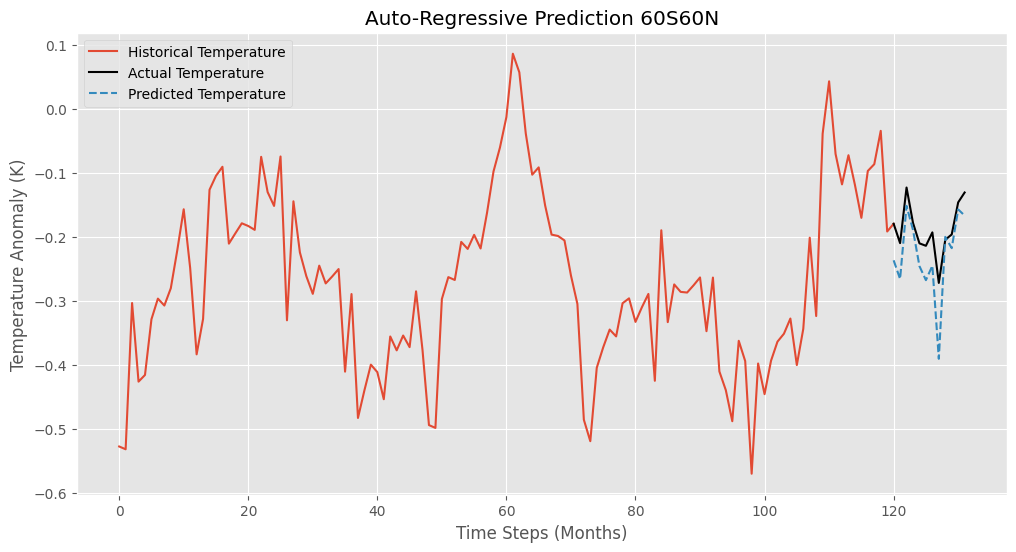

In [96]:
display_test_results('results/auto_reg_test_results.pkl', 'Auto-Regressive Prediction 60S60N', figname='Auto-Regressive Prediction 60S60N')

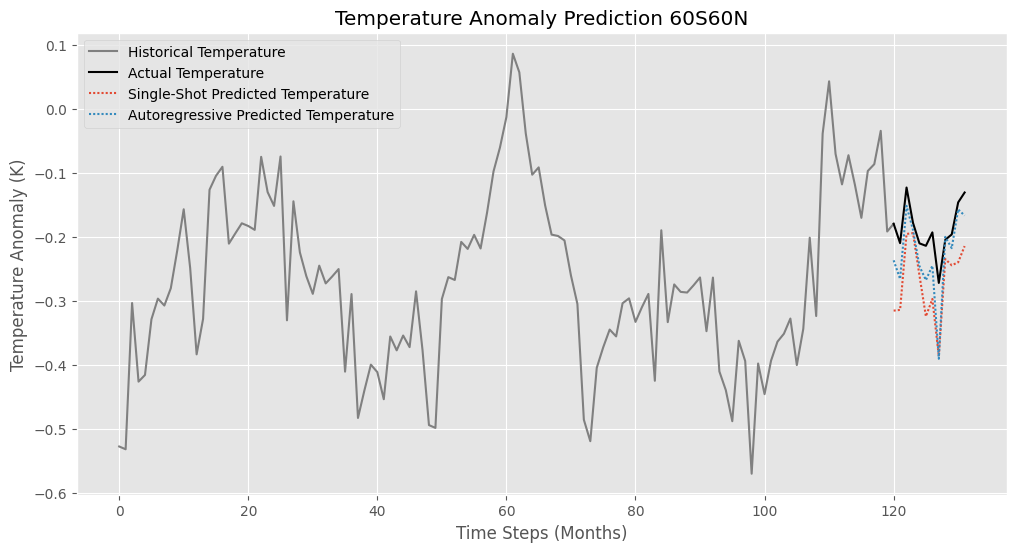

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.style.use('ggplot')

def plot_combined_predictions(single_shot_results, auto_reg_results, title, figname):
    sample_index = 2  # Example sample index
    location_index = 2  # Example location index

    # Extracting data for the single-shot model
    ss_inputs = single_shot_results['inputs'][sample_index][:, location_index]
    ss_predictions = single_shot_results['predictions'][sample_index][:, location_index]
    ss_targets = single_shot_results['targets'][sample_index][:, location_index]

    # Extracting data for the auto-regressive model
    ar_predictions = auto_reg_results['predictions'][sample_index][:, location_index]
    
    # Time axes
    time_axis_input = np.arange(len(ss_inputs))
    time_axis_future = np.arange(len(ss_inputs), len(ss_inputs) + len(ss_targets))
    
    # Extending the historical data with the first actual temperature point for a seamless transition
    extended_input_sample = np.append(ss_inputs, ss_targets[0])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(extended_input_sample, label='Historical Temperature', color='grey', zorder=1)  # Plot extended historical data
    plt.plot(time_axis_future, ss_targets, label='Actual Temperature', color='black', zorder=2)
    plt.plot(time_axis_future, ss_predictions, label='Single-Shot Predicted Temperature', linestyle=(0, (1, 1)), zorder=3)
    plt.plot(time_axis_future, ar_predictions, label='Autoregressive Predicted Temperature', linestyle=(0, (1, 1)), zorder=4)

    plt.title(title)
    plt.xlabel('Time Steps (Months)')
    plt.ylabel('Temperature Anomaly (K)')
    plt.legend()
    plt.savefig(f'figures/{figname}.jpg', format='jpg', dpi=300)
    plt.show()


# Loading test results
with open('results/single_shot_test_results.pkl', 'rb') as f:
    single_shot_results = pickle.load(f)

with open('results/auto_reg_test_results.pkl', 'rb') as f:
    auto_reg_results = pickle.load(f)

# Plotting combined predictions
plot_combined_predictions(single_shot_results, auto_reg_results, 'Temperature Anomaly Prediction 60S60N', 'Temperature Anomaly Prediction 60S60N')
